In [1]:
# !ls -hl|grep csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from time import time, ctime
from sklearn.metrics import accuracy_score, classification_report, classification, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from helper import plot_confusion_matrix, plot_confusion_matrix2
dim=lambda *x: [i.shape for i in x]

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%time
df = pd.read_csv('./preprocessed.csv')
print df.shape

(49260, 748)
CPU times: user 2.74 s, sys: 224 ms, total: 2.96 s
Wall time: 2.96 s


In [3]:
X = df.iloc[:,2:].values
print X.shape
y = df.iloc[:,1].map({'male':1,'female':0}).values
print y.shape
df.head(1)

(49260, 746)
(49260,)


,username,fname.gender,username_split_predict,last,last_two,first,first2,nchar,vowels.pct,digits.pct,...,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,unknow,n,on,b,bi,7,0.428571,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0


In [4]:
%%time
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for i in range(5):
    i=str(i)
    exec("labelencoder_X_{} = LabelEncoder()".format(i))
    exec("X[:, {}] = labelencoder_X_{}.fit_transform(X[:, {}])".format(i,i,i))

CPU times: user 142 ms, sys: 1e+03 µs, total: 143 ms
Wall time: 141 ms


In [5]:
%%time
print X.shape
onehotencoder = OneHotEncoder(categorical_features = range(6))
X = onehotencoder.fit_transform(X).toarray()
print X.shape

(49260, 746)
(49260, 4505)
CPU times: user 1.3 s, sys: 478 ms, total: 1.78 s
Wall time: 1.78 s


In [6]:
%%time
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fit on training set
X = sc.fit_transform(X)
print X.shape

(49260, 4505)
CPU times: user 2.88 s, sys: 1.54 s, total: 4.42 s
Wall time: 4.42 s


https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

In [7]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier,\
ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier

from mlxtend.classifier import StackingClassifier

import numpy as np

In [8]:
ctime()

'Sat Nov 11 12:17:14 2017'

In [ ]:
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=320, min_samples_split=4, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr)

print('5-fold cross validation:\n')

if __name__ == '__main__':
    stack1=[]
    for clf, label in zip([clf1, clf2, clf3, clf4, clf5,  sclf], 
                          ['AdaBoost', 
                           'Random Forest', 
                           'Xgboost',
                           'Bagging',
                           'ExtraTrees',
                           'Stacking']):

        scores = model_selection.cross_val_score(clf, X, y, 
#                                                  n_jobs=-1,
                                                  cv=5, scoring='accuracy')
        stack1.append([label, scores, scores.mean(), scores.std()])
        print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
              % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.8237 (+/- 0.0008) [AdaBoost]
Accuracy: 0.8244 (+/- 0.0013) [Random Forest]
Accuracy: 0.8298 (+/- 0.0019) [Xgboost]
Accuracy: 0.8269 (+/- 0.0019) [Bagging]
Accuracy: 0.8268 (+/- 0.0012) [ExtraTrees]


In [ ]:
S1_time = ctime()
S1_time

In [ ]:
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=320, min_samples_split=4, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr, 
                         use_probas=True,
                          average_probas=False)

print('5-fold cross validation:\n')

if __name__ == '__main__':
    
    stack2 = []
    for clf, label in zip([clf1, clf2, clf3, clf4, clf5,  sclf], 
                          ['AdaBoost', 
                           'Random Forest', 
                           'Xgboost',
                           'Bagging',
                           'ExtraTrees',
                           'Stacking']):

        scores = model_selection.cross_val_score(clf, X, y, 
#                                                  n_jobs=-1,
                                                  cv=5, scoring='accuracy')
        stack2.append([label, scores, scores.mean(), scores.std()])
        print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
              % (scores.mean(), scores.std(), label))

In [ ]:
S2_time = ctime()
S2_time

In [15]:
stack1

[['AdaBoost',
  array([ 0.82330255,  0.82511165,  0.8226756 ,  0.82369062,  0.8234697 ]),
  0.82365002369368789,
  0.00080507980493064015],
 ['Random Forest',
  array([ 0.82299807,  0.82592367,  0.82511165,  0.82521315,  0.82275911]),
  0.82440113197399723,
  0.0012764916941748496],
 ['Xgboost',
  array([ 0.82989952,  0.8317093 ,  0.8316078 ,  0.82917174,  0.82661659]),
  0.82980098897816001,
  0.001868275523513574],
 ['Bagging',
  array([ 0.82604283,  0.82998376,  0.82805522,  0.82531466,  0.8250939 ]),
  0.8268980724943058,
  0.0018630156210343507],
 ['ExtraTrees',
  array([ 0.82685477,  0.82835972,  0.82754771,  0.82643118,  0.82489087]),
  0.82681685010371453,
  0.0011639735131901646],
 ['Stacking',
  array([ 0.82746372,  0.82785221,  0.82846123,  0.82582217,  0.82570297]),
  0.82706045958704189,
  0.001107047276820309]]

In [16]:
stack2

[['AdaBoost',
  array([ 0.82330255,  0.82511165,  0.8226756 ,  0.82369062,  0.8234697 ]),
  0.82365002369368789,
  0.00080507980493064015],
 ['Random Forest',
  array([ 0.82299807,  0.82592367,  0.82511165,  0.82521315,  0.82275911]),
  0.82440113197399723,
  0.0012764916941748496],
 ['Xgboost',
  array([ 0.82989952,  0.8317093 ,  0.8316078 ,  0.82917174,  0.82661659]),
  0.82980098897816001,
  0.001868275523513574],
 ['Bagging',
  array([ 0.82523089,  0.82825822,  0.82886724,  0.82470564,  0.82377424]),
  0.8261672461092564,
  0.0020199828324036695],
 ['ExtraTrees',
  array([ 0.82726073,  0.82754771,  0.82825822,  0.8271417 ,  0.82560146]),
  0.82716196388000418,
  0.00087131062491349154],
 ['Stacking',
  array([ 0.83203085,  0.83353634,  0.83038977,  0.8271417 ,  0.8275302 ]),
  0.83012577140370336,
  0.002488882720539454]]

### trainning real model

In [12]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.3, stratify =y, 
                                                  random_state=7)
print dim(X_train, y_train, X_test, y_test )

[(34482, 4505), (34482,), (14778, 4505), (14778,)]


In [13]:
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=2, n_jobs=-1)
clf3 = XGBClassifier(nthread=-1, max_depth=24,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)
clf4 = BaggingClassifier(n_jobs=-1, n_estimators=50)
clf5 = ExtraTreesClassifier(n_jobs=-1, bootstrap=True, n_estimators=100)

lr = LogisticRegression(solver='lbfgs', n_jobs=-1)

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                          meta_classifier=lr, 
                         use_probas=True,
                          average_probas=False)

In [16]:
%%time
sclf.fit(X=X_train, y=y_train)

CPU times: user 51min 56s, sys: 8.14 s, total: 52min 4s
Wall time: 7min 48s


StackingClassifier(average_probas=False,
          classifiers=[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None), RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            mi...imators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
          use_features_in_secondary=False, use_probas=True, verbose=0)

In [18]:
%%time
pred = sclf.predict(X_test)
print pred

CPU times: user 31.9 s, sys: 1.3 s, total: 33.2 s
Wall time: 27.8 s


In [22]:
pd.Series(pred).value_counts()

1    13937
0      841
dtype: int64

In [23]:
accuracy_score(y_test, pred)

0.835431046149682

Confusion matrix, without normalization
[[  535  2126]
 [  306 11811]]


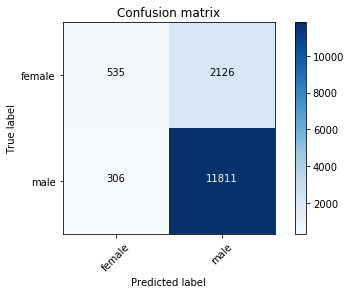

In [24]:
plot_confusion_matrix(confusion_matrix(y_test, pred), classes=['female','male'])

In [27]:
%%time
pred2 = sclf.predict_proba(X_test)
print pred2

[[  1.42345074e-01   8.57654926e-01]
 [  1.22767355e-04   9.99877233e-01]
 [  3.18890248e-03   9.96811098e-01]
 ..., 
 [  1.27312696e-02   9.87268730e-01]
 [  9.01034671e-03   9.90989653e-01]
 [  6.51844049e-05   9.99934816e-01]]
CPU times: user 32.8 s, sys: 1.6 s, total: 34.4 s
Wall time: 27.7 s


In [42]:
(pred2>0.6)[:,1]

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [31]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [106]:
accuracy_score(y_test, (pred2>0.3)[:,1])

0.83719041818920015

Confusion matrix, without normalization
[[  466  2195]
 [  211 11906]]


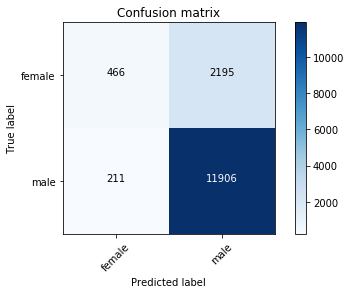

In [107]:
plot_confusion_matrix(confusion_matrix(y_test, (pred2>0.3)[:,1]), classes=['female','male'])

In [113]:
%%time
xg = XGBClassifier(nthread=-1, max_depth=24, n_estimators=300,
                        min_child_weight=0.9, colsample_bytree=0.9,
                       scale_pos_weight= 0.9, reg_alpha=0.6)

xg.fit(X_train, y_train, verbose=10, early_stopping_rounds= 20,
       eval_set=[[X_train, y_train], [X_test, y_test]])

xg_pred = xg.predict(X_test)
xg_pred2 = xg.predict_proba(X_test)

[0]	validation_0-error:0.139116	validation_1-error:0.197794
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[10]	validation_0-error:0.12827	validation_1-error:0.173501
[20]	validation_0-error:0.117946	validation_1-error:0.172012
[30]	validation_0-error:0.103474	validation_1-error:0.170727
[40]	validation_0-error:0.091149	validation_1-error:0.169576
[50]	validation_0-error:0.080361	validation_1-error:0.169306
[60]	validation_0-error:0.072937	validation_1-error:0.169035
[70]	validation_0-error:0.066701	validation_1-error:0.168358
[80]	validation_0-error:0.058146	validation_1-error:0.167749
[90]	validation_0-error:0.051128	validation_1-error:0.167411
[100]	validation_0-error:0.046691	validation_1-error:0.167546
Stopping. Best iteration:
[85]	validation_0-error:0.054115	validation_1-error:0.167073

CPU times: user 49min 39s, sys: 4.76 s, total: 49min 44s
Wall time: 2min 16s


In [115]:
accuracy_score(y_test, xg_pred)

0.83279198809040467

Confusion matrix, without normalization
[[  430  2231]
 [  240 11877]]


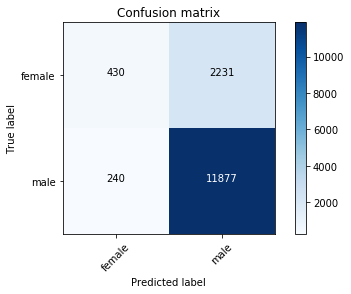

In [116]:
plot_confusion_matrix(confusion_matrix(y_test, xg_pred), classes=['female','male'])